<a href="https://colab.research.google.com/github/Atma-vidya-manoj/CAPSTONE/blob/main/CNNandMobilenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

cnn


Category distribution:
Recyclable Waste: 16
Medical Waste: 11
Toxic Waste: 12
Human Presence: 7
Miscellaneous Waste: 9
Non-Recyclable: 4
Industrial Waste: 20
Hazardous Waste: 25
E-Waste: 13
Trash: 3
Bio-Degradable Waste: 9
Hazardous Waste and Medical waste: 1
Hazardous Waste & Medical Waste: 1
Metal: 2
Non-Degradable Waste: 5
Recyclable Waste Plastic Bottles: 1
Non-Recyclable Waste: 4
Hazardous Waste & Medical waste: 1


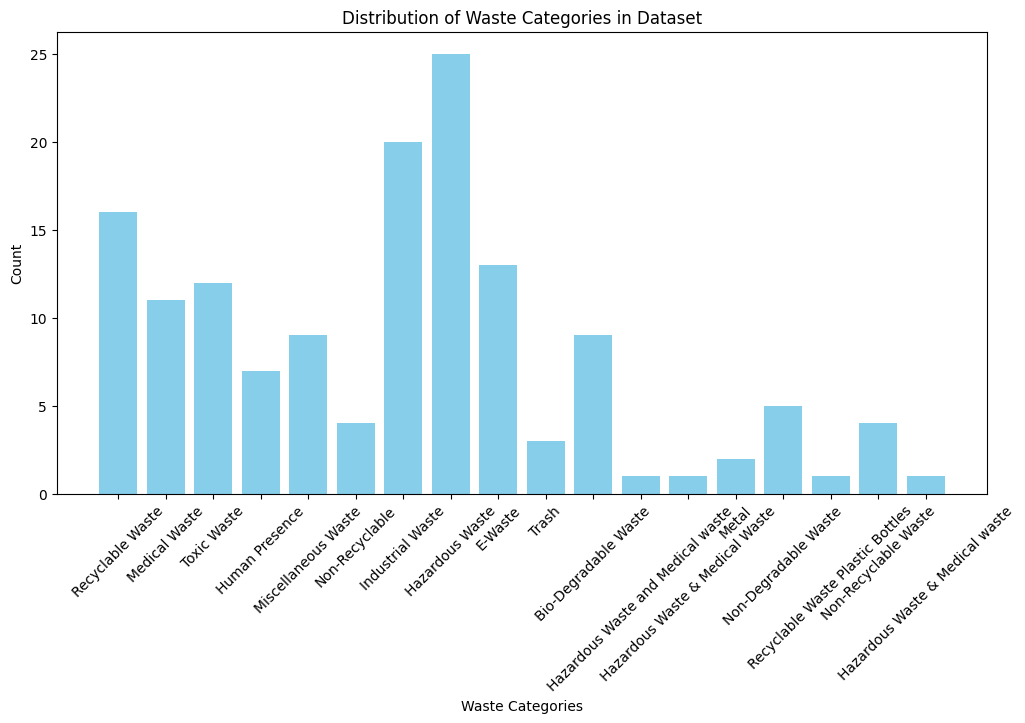

In [ ]:
import os
import matplotlib.pyplot as plt
from collections import Counter

# Paths to your dataset
label_dir = 'Dataset/labels'  # Update with your actual label folder path

# Read label files and count categories
category_counts = Counter()
for label_file in os.listdir(label_dir):
    label_path = os.path.join(label_dir, label_file)
    with open(label_path, "r") as f:
        first_line = f.readline().strip()  # Read first line as main category
        category_counts[first_line.split(",")[0]] += 1  # Extract category

# Print the categories and their counts
print("Category distribution:")
for category, count in category_counts.items():
    print(f"{category}: {count}")

# Plot category distribution
plt.figure(figsize=(12, 6))
plt.bar(category_counts.keys(), category_counts.values(), color="skyblue")
plt.xlabel("Waste Categories")
plt.ylabel("Count")
plt.title("Distribution of Waste Categories in Dataset")
plt.xticks(rotation=45)
plt.show()


Category distribution:
Recyclable Waste: 17
Medical Waste: 11
Toxic Waste: 12
Human Presence: 7
Miscellaneous Waste: 9
Non-Recyclable: 4
Industrial Waste: 20
Hazardous Waste: 27
E-Waste: 13
Trash: 3
Bio-Degradable Waste: 9
Metal: 2
Non-Degradable Waste: 5
Non-Recyclable Waste: 4
Hazardous Waste & Medical waste: 1


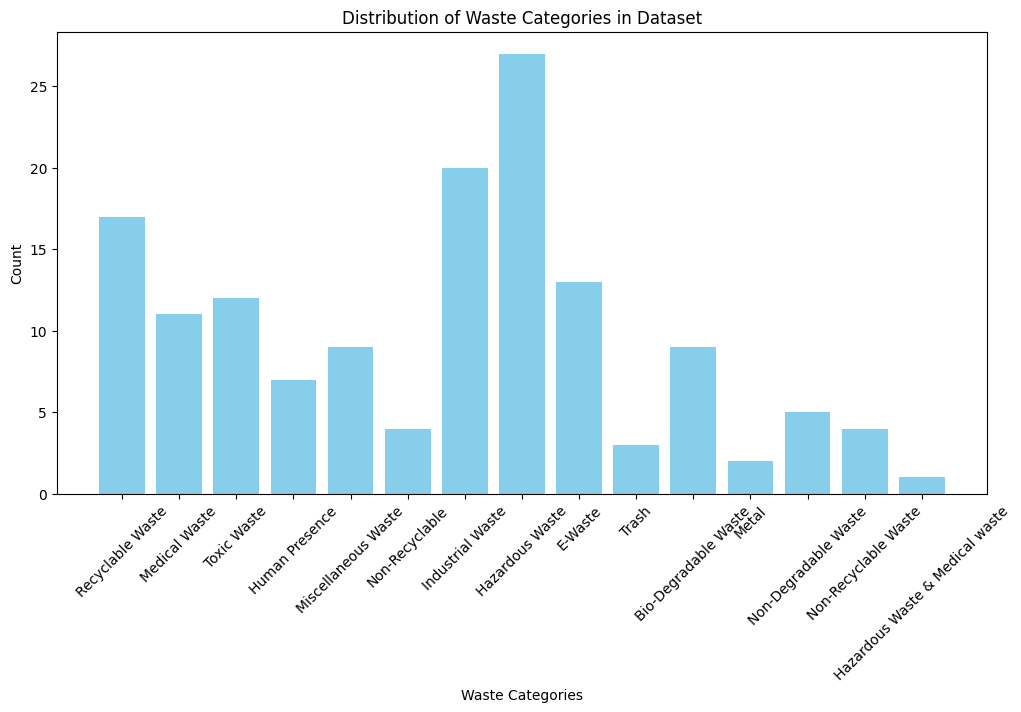

In [ ]:
import os
import matplotlib.pyplot as plt
from collections import Counter

# Paths to your dataset
label_dir = 'Dataset/labels'  # Update with your actual label folder path

# Define a dictionary for normalizing categories
category_normalization = {
    "Hazardous Waste & Medical Waste": "Hazardous Waste",
    "Hazardous Waste and Medical waste": "Hazardous Waste",
    "0 0.5 0.5 0.2 0.2": "Uncategorized",  # or remove as needed
    "Recyclable Waste Plastic Bottles": "Recyclable Waste",
    # Add more mappings here for other variations if necessary
}

# Read label files and count categories
category_counts = Counter()
for label_file in os.listdir(label_dir):
    label_path = os.path.join(label_dir, label_file)
    with open(label_path, "r") as f:
        first_line = f.readline().strip()  # Read first line as main category
        # Normalize the category name
        category = first_line.split(",")[0]
        category = category_normalization.get(category, category)  # Apply normalization
        category_counts[category] += 1  # Extract and count normalized category

# Print the categories and their counts
print("Category distribution:")
for category, count in category_counts.items():
    print(f"{category}: {count}")

# Plot category distribution
plt.figure(figsize=(12, 6))
plt.bar(category_counts.keys(), category_counts.values(), color="skyblue")
plt.xlabel("Waste Categories")
plt.ylabel("Count")
plt.title("Distribution of Waste Categories in Dataset")
plt.xticks(rotation=45)
plt.show()


In [ ]:
import os
import yaml

# Paths to your dataset
image_dir = 'Dataset/images'  # Update with your actual image folder path
label_dir = 'Dataset/labels'  # Update with your actual label folder path
output_yml = 'Dataset/dataset.yml'    # Path to save the output .yml file

# Function to link all images to their corresponding labels
def link_images_to_labels(image_dir, label_dir):
    image_filenames = [f for f in os.listdir(image_dir) if f.endswith(('.jpeg', '.jpg'))]
    image_label_pairs = []  # List to store pairs of (image_path, label_path)

    for image_filename in image_filenames:
        # Create corresponding label filename (replace extension)
        label_filename = image_filename.replace('.jpeg', '.txt').replace('.jpg', '.txt')
        label_path = os.path.join(label_dir, label_filename)

        if os.path.exists(label_path):
            # Link image and label
            image_path = os.path.join(image_dir, image_filename)
            image_label_pairs.append({'image': image_path, 'label': label_path})

    return image_label_pairs

# Link all images to labels
image_label_pairs = link_images_to_labels(image_dir, label_dir)

# Check if any image-label pairs were found
if len(image_label_pairs) == 0:
    print("No image-label pairs were found. Please check your dataset.")
else:
    # Save the data to a YAML file
    def save_to_yaml(data, output_file):
        with open(output_file, 'w') as file:
            yaml.dump(data, file, default_flow_style=False)

    # Save the image-label pairs to a .yml file
    save_to_yaml(image_label_pairs, output_yml)

    print(f"Dataset has been saved to {output_yml}")

    # Optionally, you can print the first few entries to verify
    print(f"First 5 linked image-label pairs:")
    for pair in image_label_pairs[:5]:  # Show the first 5 pairs for verification
        print(f"Image: {pair['image']} -> Label: {pair['label']}")


Dataset has been saved to Dataset/dataset.yml
First 5 linked image-label pairs:
Image: Dataset/images/148.jpeg -> Label: Dataset/labels/148.txt
Image: Dataset/images/102.jpeg -> Label: Dataset/labels/102.txt
Image: Dataset/images/22.jpeg -> Label: Dataset/labels/22.txt
Image: Dataset/images/61.jpeg -> Label: Dataset/labels/61.txt
Image: Dataset/images/124.jpeg -> Label: Dataset/labels/124.txt


In [ ]:
import os
import cv2
import yaml
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load image-label pairs from dataset.yml
with open('Dataset/dataset.yml', 'r') as file:
    data = yaml.load(file, Loader=yaml.FullLoader)

# Function to preprocess the data
def preprocess_data(data, img_size=(224, 224)):
    images = []
    labels = []
    label_map = {}  # Dictionary to map category names to integers
    label_idx = 0

    for entry in data:
        image_path = entry['image']
        label_path = entry['label']

        # Load and resize image
        image = cv2.imread(image_path)
        image = cv2.resize(image, img_size)
        image = img_to_array(image)

        # Append image to the list
        images.append(image)

        # Load the label and extract the category
        with open(label_path, 'r') as f:
            label_text = f.readline().strip()  # Get the main category (first part)
            category = label_text.split(",")[0]  # Extract the category name

            if category not in label_map:
                label_map[category] = label_idx
                label_idx += 1

            # Convert label to integer
            labels.append(label_map[category])

    # Convert images and labels to numpy arrays
    images = np.array(images, dtype="float32") / 255.0  # Normalize images
    labels = np.array(labels)

    # One-hot encode the labels
    labels = to_categorical(labels, num_classes=len(label_map))

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test, label_map

# Preprocess the data
X_train, X_test, y_train, y_test, label_map = preprocess_data(data)

# Print out the label mapping
print("Label Map:", label_map)

# Optionally, you can check the shape of the data
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Label Map: {'Trash': 0, 'E-Waste': 1, 'Recyclable Waste': 2, 'Hazardous Waste': 3, 'Industrial Waste': 4, 'Non-Degradable Waste': 5, 'Bio-Degradable Waste': 6, 'Non-Recyclable': 7, 'Medical Waste': 8, 'Toxic Waste': 9, 'Non-Recyclable Waste': 10, 'Miscellaneous Waste': 11, 'Human Presence': 12, 'Hazardous Waste and Medical waste': 13, 'Hazardous Waste & Medical Waste': 14, 'Metal': 15, 'Hazardous Waste & Medical waste': 16}
Training data shape: (113, 224, 224, 3)
Testing data shape: (29, 224, 224, 3)


CNN

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split

# Paths to your dataset
image_dir = 'Dataset/images'  # Update with your actual image folder path
label_dir = 'Dataset/labels'  # Update with your actual label folder path

# Load the images and labels
def load_images_and_labels(image_dir, label_dir, img_height=224, img_width=224):
    images = []
    labels = []
    label_map = {}  # Mapping from category name to integer label

    # Read each image and its corresponding label file
    image_filenames = [f for f in os.listdir(image_dir) if f.endswith(('.jpeg', '.jpg'))]

    for filename in image_filenames:
        # Load the image
        img_path = os.path.join(image_dir, filename)
        img = image.load_img(img_path, target_size=(img_height, img_width))
        img_array = image.img_to_array(img)

        # Load the corresponding label
        label_filename = filename.replace('.jpeg', '.txt').replace('.jpg', '.txt')
        label_path = os.path.join(label_dir, label_filename)

        # Check if label file exists before trying to open it
        if os.path.exists(label_path):
            images.append(img_array) # Append image only if label file exists
            with open(label_path, 'r') as f:
                # Assume the first line of the label file contains the category
                first_line = f.readline().strip()
                category = first_line.split(",")[0]  # Extract the main category

                if category not in label_map:
                    label_map[category] = len(label_map)  # Assign a new integer label

                labels.append(label_map[category])
        else:
            print(f"Warning: Label file not found for image: {filename}, skipping this image.")
            # Skip the image if the label file is not found
            continue

    # Convert images and labels to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    return images, labels, label_map

# Load the images and labels
images, labels, label_map = load_images_and_labels(image_dir, label_dir)

# Split the data into training and testing sets (80% train, 20% test)
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Normalize the images to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Print the shapes of the data
print(f"Training data shape: {train_images.shape}")
print(f"Testing data shape: {test_images.shape}")

Training data shape: (113, 224, 224, 3)
Testing data shape: (29, 224, 224, 3)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Model parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
NUM_CLASSES = len(label_map)  # Number of unique categories

# Build the CNN model
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))

    # First Conv Layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Second Conv Layer
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Third Conv Layer
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten and Dense Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))  # Softmax for multi-class classification

    return model

# Prepare the data (assuming `train_images` and `train_labels` are loaded)
train_images = train_images / 255.0  # Normalize the images to the range [0, 1]
test_images = test_images / 255.0  # Normalize the images to the range [0, 1]

# Compile the model
cnn_model = create_cnn_model((IMG_HEIGHT, IMG_WIDTH, 3), NUM_CLASSES)
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_accuracy = cnn_model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.1183 - loss: 2.8202 - val_accuracy: 0.2414 - val_loss: 2.5612
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.1575 - loss: 2.6638 - val_accuracy: 0.2414 - val_loss: 2.5063
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.1593 - loss: 2.5892 - val_accuracy: 0.1724 - val_loss: 2.5384
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.1271 - loss: 2.6008 - val_accuracy: 0.1724 - val_loss: 2.4920
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 25s 6s/step - accuracy: 0.1271 - loss: 2.5280 - val_accuracy: 0.2414 - val_loss: 2.4722
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.1450 - loss: 2.6192 - val_accuracy: 0.2414 - val_loss: 2.5381
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.1450 - loss: 2.5875 - val_accuracy: 0.2414 - val_loss: 2.4447
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.1460 - loss: 2.5507 - val_accuracy: 0.2414 - val_loss: 2.4148
Epoch 9/

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Model parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
NUM_CLASSES = len(label_map)  # Number of unique categories

# Build the CNN model
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))

    # First Conv Layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Second Conv Layer
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Third Conv Layer
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten and Dense Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))  # Softmax for multi-class classification

    return model

# Prepare the data (assuming `train_images`, `train_labels`, `test_images`, and `test_labels` are loaded)
train_images = train_images / 255.0  # Normalize the images to the range [0, 1]
test_images = test_images / 255.0  # Normalize the images to the range [0, 1]

# Compile the model
cnn_model = create_cnn_model((IMG_HEIGHT, IMG_WIDTH, 3), NUM_CLASSES)
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_accuracy = cnn_model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict on test data
predictions = cnn_model.predict(test_images)
predictions = np.argmax(predictions, axis=1)  # Get the predicted class

# Convert test labels to a suitable format (if needed, e.g., using label_map)
true_labels = test_labels

# Calculate Precision
precision = precision_score(true_labels, predictions, average='weighted', zero_division=1)
print(f"Precision: {precision:.2f}")

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(true_labels, predictions)
print(f"MAE: {mae:.2f}")

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(true_labels, predictions)
print(f"MSE: {mse:.2f}")

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

# Calculate MAPE (Mean Absolute Percentage Error)
mape = mean_absolute_percentage_error(true_labels, predictions)
print(f"MAPE: {mape:.2f}")


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.0852 - loss: 2.8159 - val_accuracy: 0.2414 - val_loss: 2.5084
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.1533 - loss: 2.6547 - val_accuracy: 0.2414 - val_loss: 2.4367
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.1366 - loss: 2.5832 - val_accuracy: 0.2414 - val_loss: 2.5220
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.1293 - loss: 2.6028 - val_accuracy: 0.2414 - val_loss: 2.4152
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.1689 - loss: 2.5819 - val_accuracy: 0.2414 - val_loss: 2.3979
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.1356 - loss: 2.6072 - val_accuracy: 0.2414 - val_loss: 2.4342
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.1596 - loss: 2.5333 - val_accuracy: 0.2414 - val_loss: 2.4452
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.1418 - loss: 2.5459 - val_accuracy: 0.2414 - val_loss: 2.4187
Epoch 9/

Image shape: (177, 284, 3)
Image min: 0, max: 255


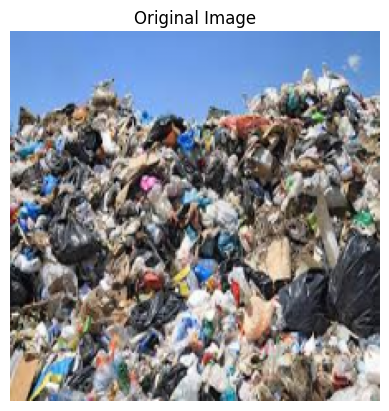

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
Predicted label for image Dataset/images/148.jpeg: Hazardous Waste


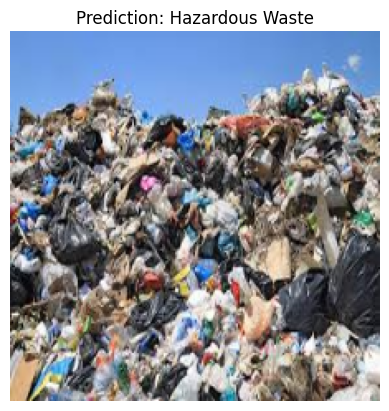

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


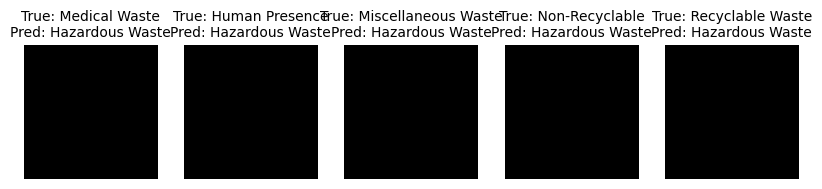

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

# Visualize predictions along with images
def visualize_predictions(test_images, true_labels, predictions, label_map, num_samples=5):
    # Select random samples from the test data
    random_indices = random.sample(range(len(test_images)), num_samples)

    plt.figure(figsize=(10, 10))

    for i, index in enumerate(random_indices):
        # Get the image and its true and predicted labels
        img = test_images[index]
        true_label = true_labels[index]
        predicted_label = predictions[index]

        # Decode the labels to their corresponding category
        true_label_name = list(label_map.keys())[true_label]
        predicted_label_name = list(label_map.keys())[predicted_label]

        # Ensure the image is in the correct range [0, 1] or [0, 255]
        if np.max(img) > 1:  # If the values are greater than 1, they are likely already in [0, 255] range.
            img = img / 255.0  # Normalize to [0, 1] range for displaying

        # Display the image
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.axis('off')

        # Title with true and predicted labels
        plt.title(f"True: {true_label_name}\nPred: {predicted_label_name}", fontsize=10)

    plt.show()

# Load a specific image for direct viewing (Example: 148th image from dataset)
img_path = 'Dataset/images/148.jpeg'  # Example path, adjust if needed
img = cv2.imread(img_path)  # Load image using OpenCV

# Check the shape of the image
print(f"Image shape: {img.shape}")

# Convert from BGR to RGB (OpenCV loads images in BGR by default)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Check the min and max values before any normalization
print(f"Image min: {img_rgb.min()}, max: {img_rgb.max()}")

# Resize image to the model input size (224x224)
resized_img = cv2.resize(img_rgb, (IMG_HEIGHT, IMG_WIDTH))

# Normalize image to the range [0, 1]
model_input_img = resized_img / 255.0

# Display the image with title (without prediction first)
plt.imshow(model_input_img)
plt.axis('off')
plt.title("Original Image")
plt.show()

# Predict the class for the image
model_input_img = np.expand_dims(model_input_img, axis=0)  # Add batch dimension
predictions = cnn_model.predict(model_input_img)
predicted_class = np.argmax(predictions)  # Get predicted class
predicted_label = list(label_map.keys())[predicted_class]  # Map to the label

print(f"Predicted label for image {img_path}: {predicted_label}")

# Now visualize the image with the predicted label overlayed
plt.imshow(resized_img)
plt.axis('off')
plt.title(f"Prediction: {predicted_label}")
plt.show()

# Predict on test data (if needed)
predictions = cnn_model.predict(test_images)
predictions = np.argmax(predictions, axis=1)  # Get the predicted class

# Visualize a few predictions with their corresponding images
visualize_predictions(test_images, test_labels, predictions, label_map)


In [ ]:
import cv2
import numpy as np

def preprocess_image(img_path):
    img = cv2.imread(img_path)  # Read the image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    img = cv2.resize(img, (224, 224))  # Resize to model input size
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension (model expects 4D input)
    return img


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

# ... (Your existing code for model training) ...

# Save the trained model
cnn_model.save('/content/waste_classification_CNN_model.h5')

# Now you can download the saved model
from google.colab import files
files.download('/content/waste_classification_CNN_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Yolo

In [ ]:
!pip install tensorflow scikit-learn numpy


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np
import os
from tensorflow.keras.preprocessing import image


In [ ]:
# Set paths to your dataset
image_dir = 'Dataset/images'
label_dir = 'Dataset/labels'

# Function to load images and labels
def load_images_and_labels(image_dir, label_dir, img_height=224, img_width=224):
    images = []
    labels = []
    label_map = {}  # Mapping from category name to integer label

    # Read each image and its corresponding label file
    image_filenames = [f for f in os.listdir(image_dir) if f.endswith(('.jpeg', '.jpg'))]

    for filename in image_filenames:
        # Load the image
        img_path = os.path.join(image_dir, filename)
        img = image.load_img(img_path, target_size=(img_height, img_width))
        img_array = image.img_to_array(img)

        # Load the corresponding label
        label_filename = filename.replace('.jpeg', '.txt').replace('.jpg', '.txt')
        label_path = os.path.join(label_dir, label_filename)

        # Check if label file exists before trying to open it
        if os.path.exists(label_path):
            images.append(img_array)  # Append image only if label file exists
            with open(label_path, 'r') as f:
                # Assume the first line of the label file contains the category
                first_line = f.readline().strip()
                category = first_line.split(",")[0]  # Extract the main category

                if category not in label_map:
                    label_map[category] = len(label_map)  # Assign a new integer label

                labels.append(label_map[category])
        else:
            print(f"Warning: Label file not found for image: {filename}, skipping this image.")
            # Skip the image if the label file is not found
            continue

    # Convert images and labels to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    return images, labels, label_map

# Load the images and labels
images, labels, label_map = load_images_and_labels(image_dir, label_dir)

# Print the label map to verify
print("Label Map:", label_map)


Label Map: {}


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split

# Paths to your dataset
image_dir = '/content/Dataset/images'  # Replace with the correct path to your images
label_dir = '/content/Dataset/labels'  # Replace with the correct path to your labels

# Verify if the paths are correct
print("Images Path exists:", os.path.exists(image_dir))  # Should print True if the path is correct
print("Labels Path exists:", os.path.exists(label_dir))  # Should print True if the path is correct

# Load the images and labels
def load_images_and_labels(image_dir, label_dir, img_height=224, img_width=224):
    images = []
    labels = []
    label_map = {}  # Mapping from category name to integer label

    # Read each image and its corresponding label file
    image_filenames = [f for f in os.listdir(image_dir) if f.endswith(('.jpeg', '.jpg'))]
    print("Image files found:", image_filenames)  # Print the list of image filenames

    for filename in image_filenames:
        # Load the image
        img_path = os.path.join(image_dir, filename)
        img = image.load_img(img_path, target_size=(img_height, img_width))
        img_array = image.img_to_array(img)

        # Load the corresponding label
        label_filename = filename.replace('.jpeg', '.txt').replace('.jpg', '.txt')
        label_path = os.path.join(label_dir, label_filename)

        # Check if label file exists before trying to open it
        if os.path.exists(label_path):
            images.append(img_array)  # Append image only if label file exists
            with open(label_path, 'r') as f:
                # Assume the first line of the label file contains the category
                first_line = f.readline().strip()
                category = first_line.split(",")[0]  # Extract the main category

                if category not in label_map:
                    label_map[category] = len(label_map)  # Assign a new integer label

                labels.append(label_map[category])
        else:
            print(f"Warning: Label file not found for image: {filename}, skipping this image.")
            # Skip the image if the label file is not found
            continue

    # Convert images and labels to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    # Verify the number of images and labels loaded
    print(f"Number of images loaded: {len(images)}")
    print(f"Shape of images array: {images.shape}")
    print(f"Shape of labels array: {labels.shape}")

    return images, labels, label_map

# Load the images and labels
images, labels, label_map = load_images_and_labels(image_dir, label_dir)

# Split the data into training and testing sets (80% train, 20% test)
if len(images) > 0:  # Ensure that images are loaded before splitting
    train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

    # Normalize the images to the range [0, 1]
    train_images = train_images / 255.0
    test_images = test_images / 255.0

    # Print the shapes of the data
    print(f"Training data shape: {train_images.shape}")
    print(f"Testing data shape: {test_images.shape}")
else:
    print("No images found. Please check your dataset.")


Images Path exists: True
Labels Path exists: True
Image files found: []
Number of images loaded: 0
Shape of images array: (0,)
Shape of labels array: (0,)
No images found. Please check your dataset.


In [ ]:
# Model parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
NUM_CLASSES = len(label_map)  # Number of unique categories

# MobileNetV2 model
def create_mobilenetv2_model(input_shape, num_classes):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze the base model layers to prevent overfitting

    model = models.Sequential()
    model.add(base_model)  # Add the MobileNetV2 base model
    model.add(layers.GlobalAveragePooling2D())  # Global average pooling for dimension reduction
    model.add(layers.Dense(128, activation='relu'))  # Dense layer for learning complex features
    model.add(layers.Dense(num_classes, activation='softmax'))  # Softmax for multi-class classification

    return model

# Build the MobileNetV2 model
mobilenetv2_model = create_mobilenetv2_model((IMG_HEIGHT, IMG_WIDTH, 3), NUM_CLASSES)

# Compile the model
mobilenetv2_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary to check architecture
mobilenetv2_model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 0)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,421,952 (9.24 MB)

 Trainable params: 163,968 (640.50 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split

# Paths to your dataset
image_dir = '/content/Dataset/images/train'  # Replace with the correct path to your images
label_dir = '/content/Dataset/labels/train'  # Replace with the correct path to your labels

# Verify if the paths are correct
print("Images Path exists:", os.path.exists(image_dir))  # Should print True if the path is correct
print("Labels Path exists:", os.path.exists(label_dir))  # Should print True if the path is correct

# Load the images and labels
def load_images_and_labels(image_dir, label_dir, img_height=224, img_width=224):
    images = []
    labels = []
    label_map = {}  # Mapping from category name to integer label

    # Read each image and its corresponding label file
    image_filenames = [f for f in os.listdir(image_dir) if f.endswith(('.jpeg', '.jpg'))]
    print("Image files found:", image_filenames)  # Print the list of image filenames

    for filename in image_filenames:
        # Load the image
        img_path = os.path.join(image_dir, filename)
        img = image.load_img(img_path, target_size=(img_height, img_width))
        img_array = image.img_to_array(img)

        # Load the corresponding label
        label_filename = filename.replace('.jpeg', '.txt').replace('.jpg', '.txt')
        label_path = os.path.join(label_dir, label_filename)

        # Check if label file exists before trying to open it
        if os.path.exists(label_path):
            images.append(img_array)  # Append image only if label file exists
            with open(label_path, 'r') as f:
                # Assume the first line of the label file contains the category
                first_line = f.readline().strip()
                category = first_line.split(",")[0]  # Extract the main category

                if category not in label_map:
                    label_map[category] = len(label_map)  # Assign a new integer label

                labels.append(label_map[category])
        else:
            print(f"Warning: Label file not found for image: {filename}, skipping this image.")
            # Skip the image if the label file is not found
            continue

    # Convert images and labels to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    # Verify the number of images and labels loaded
    print(f"Number of images loaded: {len(images)}")
    print(f"Shape of images array: {images.shape}")
    print(f"Shape of labels array: {labels.shape}")

    return images, labels, label_map

# Load the images and labels
images, labels, label_map = load_images_and_labels(image_dir, label_dir)

# Split the data into training and testing sets (80% train, 20% test)
if len(images) > 0:  # Ensure that images are loaded before splitting
    train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

    # Normalize the images to the range [0, 1]
    train_images = train_images / 255.0
    test_images = test_images / 255.0

    # Print the shapes of the data
    print(f"Training data shape: {train_images.shape}")
    print(f"Testing data shape: {test_images.shape}")
else:
    print("No images found. Please check your dataset.")

Images Path exists: True
Labels Path exists: True
Image files found: ['148.jpeg', '102.jpeg', '22.jpeg', '71.jpeg', '61.jpeg', '124.jpeg', '125.jpeg', '120.jpeg', '47.jpeg', '39.jpeg', '129.jpeg', '5.jpg', '36.jpeg', '66.jpeg', '119.jpeg', '91.jpeg', '149.jpeg', '89.jpeg', '90.jpeg', '38.jpeg', '50.jpeg', '113.jpeg', '25.jpg', '59.jpeg', '21.jpeg', '37.jpeg', '40.jpeg', '130.jpeg', '107.jpeg', '78.jpeg', '94.jpeg', '30.jpeg', '33.jpeg', '67.jpeg', '146.jpeg', '24.jpeg', '123.jpeg', '132.jpeg', '77.jpeg', '34.jpeg', '96.jpeg', '69.jpeg', '20.jpeg', '116.jpeg', '100.jpeg', '43.jpeg', '137.jpeg', '70.jpeg', '28.jpeg', '121.jpeg', '29.jpeg', '13.jpeg', '49.jpeg', '7.jpg', '9.jpeg', '97.jpeg', '75.jpeg', '18.jpeg', '48.jpeg', '63.jpeg', '16.jpeg', '85.jpeg', '56.jpeg', '54.jpeg', '53.jpeg', '133.jpeg', '83.jpeg', '86.jpeg', '19.jpeg', '4.jpeg', '51.jpeg', '74.jpeg', '12.jpeg', '11.jpeg', '80.jpeg', '122.jpeg', '72.jpeg', '138.jpeg', '6.jpeg', '87.jpg', '108.jpeg', '52.jpeg', '111.jpeg', '10

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from sklearn.metrics import precision_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Assuming you've already loaded and preprocessed your data (images and labels)
# Use MobileNetV2 as base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom head for classification
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')  # NUM_CLASSES should be the number of categories in your dataset
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model (this is just an example; you should use your actual training process)
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Predict on test data
predictions = model.predict(test_images)
predictions = np.argmax(predictions, axis=1)  # Get the predicted class

# Convert test labels to a suitable format (if needed, e.g., using label_map)
true_labels = test_labels

# Calculate Precision
precision = precision_score(true_labels, predictions, average='weighted', zero_division=1)
print(f"Precision: {precision:.2f}")

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(true_labels, predictions)
print(f"MAE: {mae:.2f}")

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(true_labels, predictions)
print(f"MSE: {mse:.2f}")

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

# Calculate MAPE (Mean Absolute Percentage Error)
mape = mean_absolute_percentage_error(true_labels, predictions)
print(f"MAPE: {mape:.2f}")


Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/tornado/ioloop.py", line 699, in <lambda>

  File "/usr/local/lib/python3.11/dist-packages/tornado/ioloop.py", line 750, in _run_callback

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 824, in inner

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 785, in run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 233, in wrapper

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 233, in wrapper

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 233, in wrapper

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-26-b5ac524dedef>", line 25, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 113, in one_step_on_data

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 60, in train_step

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/trainer.py", line 383, in _compute_loss

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/trainer.py", line 351, in compute_loss

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/compile_utils.py", line 691, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/compile_utils.py", line 700, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/losses/loss.py", line 67, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py", line 33, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py", line 2246, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py", line 1963, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py", line 744, in sparse_categorical_crossentropy

Must have at least one class, but got logits shape [32,0]
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_multi_step_on_iterator_12967]